# 機械学習帳 確認問題(1.9)

[機械学習帳の単回帰の確認問題(1.9)](https://chokkan.github.io/mlnote/regression/01sra.html#id13)を解きます。

## 講義内容の復習

![chapter1-1](./images/chapter1/chapter1-1.PNG)

![chapter1-2](./images/chapter1/chapter1-2.PNG)

## 0. データの準備

演習用のデータを定義します。

In [2]:
import numpy as np


D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])
X = D[:,0]
Y = D[:,1]

## 1. 単回帰の実装

単回帰のクラス`SimpleRegression`を定義します。`train`でパラメーターを求め、`predict`で目的変数を推定します。

In [3]:
class SimpleRegression():
    
    def __init__(self):
        self.a = None
        self.b = None

    def train(self, examples):
        x = examples[:,0]
        y = examples[:,1]
        # np.cov returns different value from np.cov
        # The reason why is ddof. Please refer he following.
        # https://stackoverflow.com/questions/57170335/why-does-np-varx-and-np-covx-y-give-me-different-values
        var = np.cov(x, y, ddof=0)
        self.a = var[0, 1] / var[0, 0]
        self.b = np.mean(y) - self.a * np.mean(x)
        return self
    
    def predict(self, x):
        return x * self.a + self.b
    
    def __repr__(self):
        return f"a={self.a}, b={self.b}"


In [3]:
model = SimpleRegression().train(D)

計算した値が適正か確認するために、a, bの値が[numpyのlstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)で求めた値とほぼ等しいか確認します。lstsqは各説明変数の重みを計算してくれます。切片の値を計算するには、説明変数として値がすべて1の定数を追加します。

In [4]:
b, a = np.linalg.lstsq(np.vstack([np.ones(len(X)), X]).T, Y, rcond=None)[0]

In [5]:
np.testing.assert_allclose((a, b), (model.a, model.b))

警告が表示されないため、lstsqで求める値と近しい値が求められていることがわかります。(※値が大きく異なると警告が出ます。試しにaやbに999など値を足してみてください)。

## 2. 回帰直線の描画

回帰直線を視覚的に確認するため図にプロットします。簡易のため、`pandas.plot`のみで描画します。

<AxesSubplot:xlabel='x', ylabel='y'>

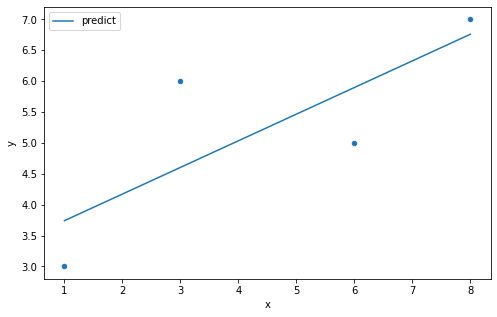

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8,5))
data = pd.DataFrame({"x": X, "y": Y, "predict": model.predict(X)})
data.plot.scatter(x="x", y="y", grid=True, ax=ax)
data.plot.line(x="x", y="predict", zorder=-1, ax=ax)

## 3. 残差の計算

目的変数と推定値の差異である残差を計算します。

In [7]:
E = data["y"] - data["predict"]

## 4. 説明変数と残差の共分散

説明変数と残差の間に相関がないことを確認します。

In [8]:
cov_x_e = np.cov(X, E)[0, 1]
np.testing.assert_almost_equal(cov_x_e, 0)

## 5. 目的変数の推定値と残差の共分散

推定値と残差の間に相関がないことを確認します。

In [9]:
cov_hat_y_e = np.cov(data["predict"], E)[0, 1]
np.testing.assert_almost_equal(cov_hat_y_e, 0)

## 6. 決定係数

決定係数を求めます。

In [10]:
r2 = 1 - np.var(E) / np.var(Y)

求めた決定係数が正確かどうか、`scikit-learn`の`r2_score`の値と比較します。

In [11]:
from sklearn.metrics import r2_score

np.testing.assert_almost_equal(r2, r2_score(Y, data["predict"]))